In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import fcluster, linkage, cophenet, dendrogram
from ipywidgets import interact, IntSlider, fixed, FloatSlider
from sklearn.datasets import make_blobs

In [ ]:
train = pd.read_csv("Alpha_bank.csv")

In [ ]:
def transform_job(x):
    if x == 'housemaid':
        return 0
    elif x == 'services':
        return 1
    elif x=='admin.':
      return 2
    elif x=='technician':
      return 3
    elif x=='blue-collar':
      return 4
    elif x=='unemployed':
      return 5
    elif x=='retired':
      return 6
    elif x=='enterpreneur':
      return 7
    elif x=='management':
      return 8
    elif x=='self_employed':
      return 9
    elif x=='student':
      return 10
    else:
        return -1
def transform_marital_status(x):
    if x == 'married':
        return 0
    elif x == 'divorced':
        return 1
    elif x=='single':
      return 2
    else:
        return -1
def transform_education(x):
    if x == 'Primary_Education':
        return 0
    elif x == 'Secondary_Education':
        return 1
    elif x=='Professional_Education':
      return 2
    elif x=='Tertiary_Education':
      return 3
    else:
        return -1
def transform_default_credit(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1  
    else:
        return -1
def transform_housing_loan(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1
    else:
        return -1
def transform_personal_loan(x):
  if x=='no':
    return 0
  elif x=='yes':
    return 1
  else:
    return -1
def transform_subscribed(x):
  if x=='no':
    return 0
  elif x=='yes':
    return 1
  else:
    return -1
def process_data(df):
    df['Job'] = df['Job'].apply(transform_job)
    df['Marital_Status'] = df['Marital_Status'].apply(transform_marital_status)
    df['Education'] = df['Education'].apply(transform_education)
    df['Default_Credit'] = df['Default_Credit'].apply(transform_default_credit)
    df['Housing_Loan'] = df['Housing_Loan'].apply(transform_housing_loan)
    df['Personal_Loan'] = df['Personal_Loan'].apply(transform_personal_loan)
    df['Subscribed'] = df['Subscribed'].apply(transform_subscribed)
    return df
train = process_data(train)

In [ ]:
features = train.columns.tolist()
target = features.pop(3)
print(target,features)

Education ['Age', 'Job', 'Marital_Status', 'Default_Credit', 'Housing_Loan', 'Personal_Loan', 'Subscribed']


In [ ]:
clusters = range(1,11)
mean = []

In [ ]:
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(train)
    mean.append(sum(np.min(cdist(train, model.cluster_centers_,"euclidean"),axis = 1))/train.shape[0])

Text(0.5, 1.0, 'Elbow method')

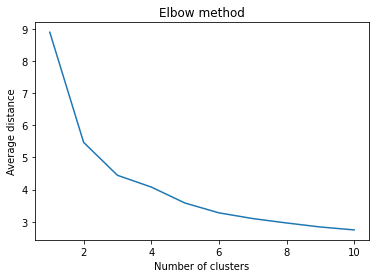

In [ ]:
plt.plot(clusters, mean)
plt.xlabel("Number of clusters")
plt.ylabel("Average distance")
plt.title("Elbow method")

In [ ]:
kmeans = KMeans(n_clusters = 2).fit(train[features])

In [ ]:
adjusted_rand_score(train[target], kmeans.labels_)

0.024169010779343917

In [ ]:
stud = linkage(train[features], method = "centroid")
labels = fcluster(stud, 2, criterion = "maxclust")

In [ ]:
adjusted_rand_score(train[target], labels)

0.011347166532750133

In [ ]:
# dend = dendrogram(stud)

In [ ]:
dbscan = DBSCAN(eps = 11, min_samples = 6).fit(train[features])

In [ ]:
adjusted_rand_score(train[target], dbscan.labels_)

0.0

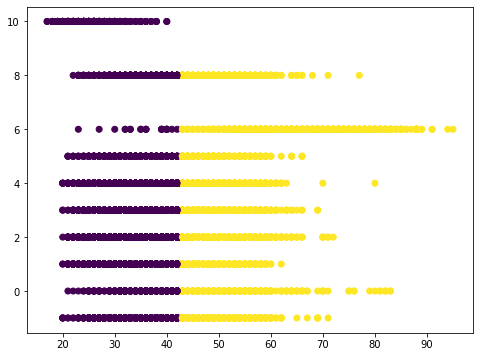

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(train.iloc[:,0],train.iloc[:,1], c=kmeans.labels_.astype(float))